# NLP Group Project 
## Heather's Notebook

In [91]:
import pandas as pd
import numpy as np
import unicodedata
import re
import nltk

# imports for visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm # for colormap tools
import seaborn as sns
from wordcloud import WordCloud

# import modules 
import prepare as p
import acquire as a

# imports for NLP extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# imports for modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, recall_score, plot_confusion_matrix


plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)
plt.style.use('seaborn-darkgrid')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Heather/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [87]:
df = pd.read_json('data2.json')

In [88]:
df.head()

,repo,language,readme_contents
0,codingXiaxw/CustomerManagement,Java,## JavaWeb项目之客户管理系统 \n\n## 项目介绍\n详细讲解请点击这里前往我的...
1,DanWahlin/CustomerManager,JavaScript,Customer Manager with AngularJS (with custom r...
2,Tophold/FinancialCustomerView,Java,## FinancialCustomerView\n* 本项目会对金融交易软件中存在的各种V...
3,DanWahlin/CustomerManagerStandard,JavaScript,Customer Manager with AngularJS\r\n===========...
4,spring-cloud-samples/customers-stores,Java,# REST based micro-services sample\n\n- Three ...


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             194 non-null    object
 1   language         187 non-null    object
 2   readme_contents  194 non-null    object
dtypes: object(3)
memory usage: 4.7+ KB


In [90]:
df.language.value_counts()

PHP                 41
Jupyter Notebook    32
JavaScript          25
Java                23
Python              20
C#                  12
HTML                 4
R                    4
TypeScript           4
Go                   3
Ruby                 3
Vue                  3
CSS                  2
HCL                  2
PowerShell           2
Dart                 2
Shell                1
ABAP                 1
Scala                1
Swift                1
Objective-C          1
Name: language, dtype: int64

In [93]:
df = p.drop_unneeded_data(df)

<AxesSubplot:>

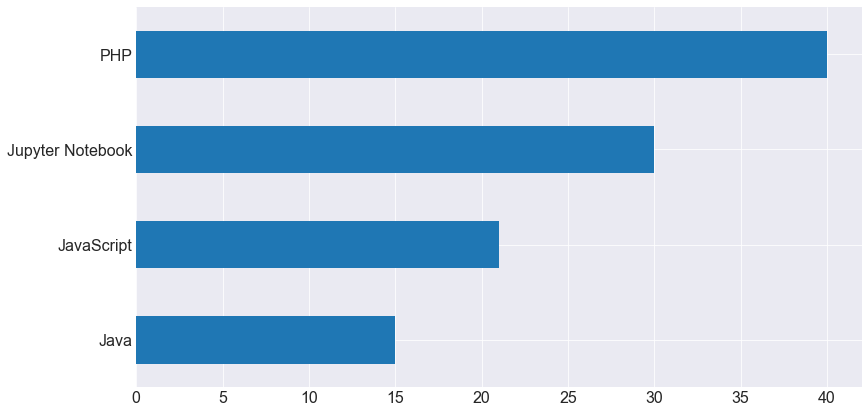

In [95]:
df.language.value_counts().sort_values(ascending = True).plot.barh()

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             106 non-null    object
 1   language         106 non-null    object
 2   readme_contents  106 non-null    object
dtypes: object(3)
memory usage: 2.6+ KB


### Explore Data

In [97]:
df = p.prepare_nlp_data(df, content = 'readme_contents')

In [98]:
df.head()

,repo,language,readme_contents,clean,stemmed,lemmatized
0,DanWahlin/CustomerManager,JavaScript,Customer Manager with AngularJS (with custom r...,customer manager angularjs custom routing dyna...,custom manag angularj custom rout dynam contro...,customer manager angularjs custom routing dyna...
1,DanWahlin/CustomerManagerStandard,JavaScript,Customer Manager with AngularJS\r\n===========...,customer manager angularjs youre new angularjs...,custom manag angularj your new angularj check ...,customer manager angularjs youre new angularjs...
2,spring-cloud-samples/customers-stores,Java,# REST based micro-services sample\n\n- Three ...,rest based microservices sample three spring b...,rest base microservic sampl three spring boot ...,rest based microservices sample three spring b...
3,eventuate-tram/eventuate-tram-examples-custome...,Java,# Eventuate Tram Customers and Orders\n\nThis ...,eventuate tram customers orders application de...,eventu tram custom order applic demonstr two k...,eventuate tram customer order application demo...
4,Featuretools/predict-customer-churn,Jupyter Notebook,# A Machine Learning Framework with an Applica...,machine learning framework application predict...,machin learn framework applic predict custom c...,machine learning framework application predict...
